# Final Project Virtual Internship ID/X Partners : Credit Risk Modelling

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 

# Load Dataset

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df

C:\Users\Vicky Jodie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


# Data Overview

In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.sample()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
408014,408014,14518638,16580955,6000,6000,6000.0,36 months,13.65,204.05,C,...,NaN,NaN,NaN,NaN,NaN,NaN,28200.0,NaN,NaN,NaN


In [6]:
df.id.nunique()

466285

In [7]:
df.member_id.nunique()

466285

There are no duplicate of id or member_id.

Remove unused features

In [8]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [9]:
df2 = df.drop(cols_to_drop, axis=1)

In [10]:
df2.sample(5)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
375111,375111,3000,3000,3000.0,36 months,13.35,101.59,C,Letter Carrier,9 years,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,286286.0,29200.0
429716,429716,2975,2975,2975.0,36 months,13.65,101.18,C,manager,10+ years,...,Feb-16,Jan-16,0.0,46.0,1,INDIVIDUAL,0.0,4263.0,353751.0,2900.0
251145,251145,28000,28000,28000.0,60 months,15.99,680.76,D,Funeral Director,6 years,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,200648.0,12400.0
383974,383974,5000,5000,5000.0,36 months,12.99,168.45,C,Truck driver,6 years,...,NaN,Jan-16,0.0,15.0,1,INDIVIDUAL,0.0,0.0,3502.0,10150.0
86663,86663,25225,25225,25225.0,60 months,20.20,671.12,D,NaN,7 years,...,NaN,May-14,0.0,NaN,1,INDIVIDUAL,0.0,0.0,39591.0,28200.0


# Choose Target

In this credit risk modeling, the variable of target is the 'loan_status' column of each individual which is data in the form of individual payment status for loan/credit payments.

In [11]:
df2.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Separate the loan status with criteria good_status of debtors and bad_status of debtors.
Defining good_status and bad_status. Good_status for individual with good payment history and bad_status for individual with late payment above 30 days or worse than that.

In [12]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

df2['bad_flag'] = np.where(df2['loan_status'].isin(bad_status), 1, 0)

In [13]:
df2['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

The number of individuals marked as bad credit is far less than good credit. This causes this problem to become a dataset imbalance problem and then drop the column of 'loan_status'

In [14]:
df2.drop('loan_status', axis=1, inplace=True)

# Data Preprocessing & Feature Engineering

Make modification and cleaning some features.

### emp_length

Modification column emp_length. Example: 4 years -> 4

In [15]:
df2['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
df2['emp_length_int'] = df2['emp_length'].str.replace('\+ years', '')
df2['emp_length_int'] = df2['emp_length_int'].str.replace('< 1 year', str(0))
df2['emp_length_int'] = df2['emp_length_int'].str.replace(' years', '')
df2['emp_length_int'] = df2['emp_length_int'].str.replace(' year', '')

C:\Users\VICKYJ~1\AppData\Local\Temp/ipykernel_11688/3093346332.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['emp_length_int'] = df2['emp_length'].str.replace('\+ years', '')


In [17]:
df2['emp_length_int'] = df2['emp_length_int'].astype(float)

In [18]:
df2.drop('emp_length', axis=1, inplace=True)

### term

Modification column term. Example: 36 months -> 36

In [19]:
df2['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
df2['term_int'] = df2['term'].str.replace(' months', '')
df2['term_int'] = df2['term_int'].astype(float)

In [21]:
df2.drop('term', axis=1, inplace=True)

### earliest_cr_line

Modification column earliest_cr_line from the month-year format to a calculation of how much time has passed since then. To do this, usually use reference date = today. However, since this dataset is a 2007-2014 dataset, it would be more relevant to use a reference date of around 2017. In this example, I'm using a reference date of 2017-12-01

In [22]:
df2['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [23]:
df2['earliest_cr_line_date'] = pd.to_datetime(df2['earliest_cr_line'], format='%b-%y')
df2['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [24]:
df2['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df2['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df2['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
df2['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

There is negative value

In [26]:
df2[df2['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


It turns out that the negative value appears because the Python function misinterprets the year 62 to be the year 2062, when it should be 1962.

To overcome this, we can do further preprocessing if we want to justify the year 2062 to 1962. However, this time I only changed the negative value to the maximum value of the feature. Since I know here that negative values ​​are old data (1900s), it still makes sense if I change these values ​​to the largest value.

In [27]:
df2.loc[df2['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df2['mths_since_earliest_cr_line'].max()

In [28]:
df2.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

The concept of preprocessing is the same as that of the column earliest_cr_line.

In [29]:
df2['issue_d_date'] = pd.to_datetime(df2['issue_d'], format='%b-%y')
df2['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df2['issue_d_date']) / np.timedelta64(1, 'M')))

In [30]:
df2['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [31]:
df2.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

The concept of preprocessing is the same as that of the column earliest_cr_line.

In [32]:
df2['last_pymnt_d_date'] = pd.to_datetime(df2['last_pymnt_d'], format='%b-%y')
df2['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df2['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [33]:
df2['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [34]:
df2.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### next_pymnt_d

The concept of preprocessing is the same as that of the column earliest_cr_line.

In [35]:
df2['next_pymnt_d_date'] = pd.to_datetime(df2['next_pymnt_d'], format='%b-%y')
df2['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df2['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [36]:
df2['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [37]:
df2.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

The concept of preprocessing is the same as that of the column earliest_cr_line.

In [38]:
df2['last_credit_pull_d_date'] = pd.to_datetime(df2['last_credit_pull_d'], format='%b-%y')
df2['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df2['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [39]:
df2['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [40]:
df2.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

### Correlation Check with Heatmap

<AxesSubplot:>

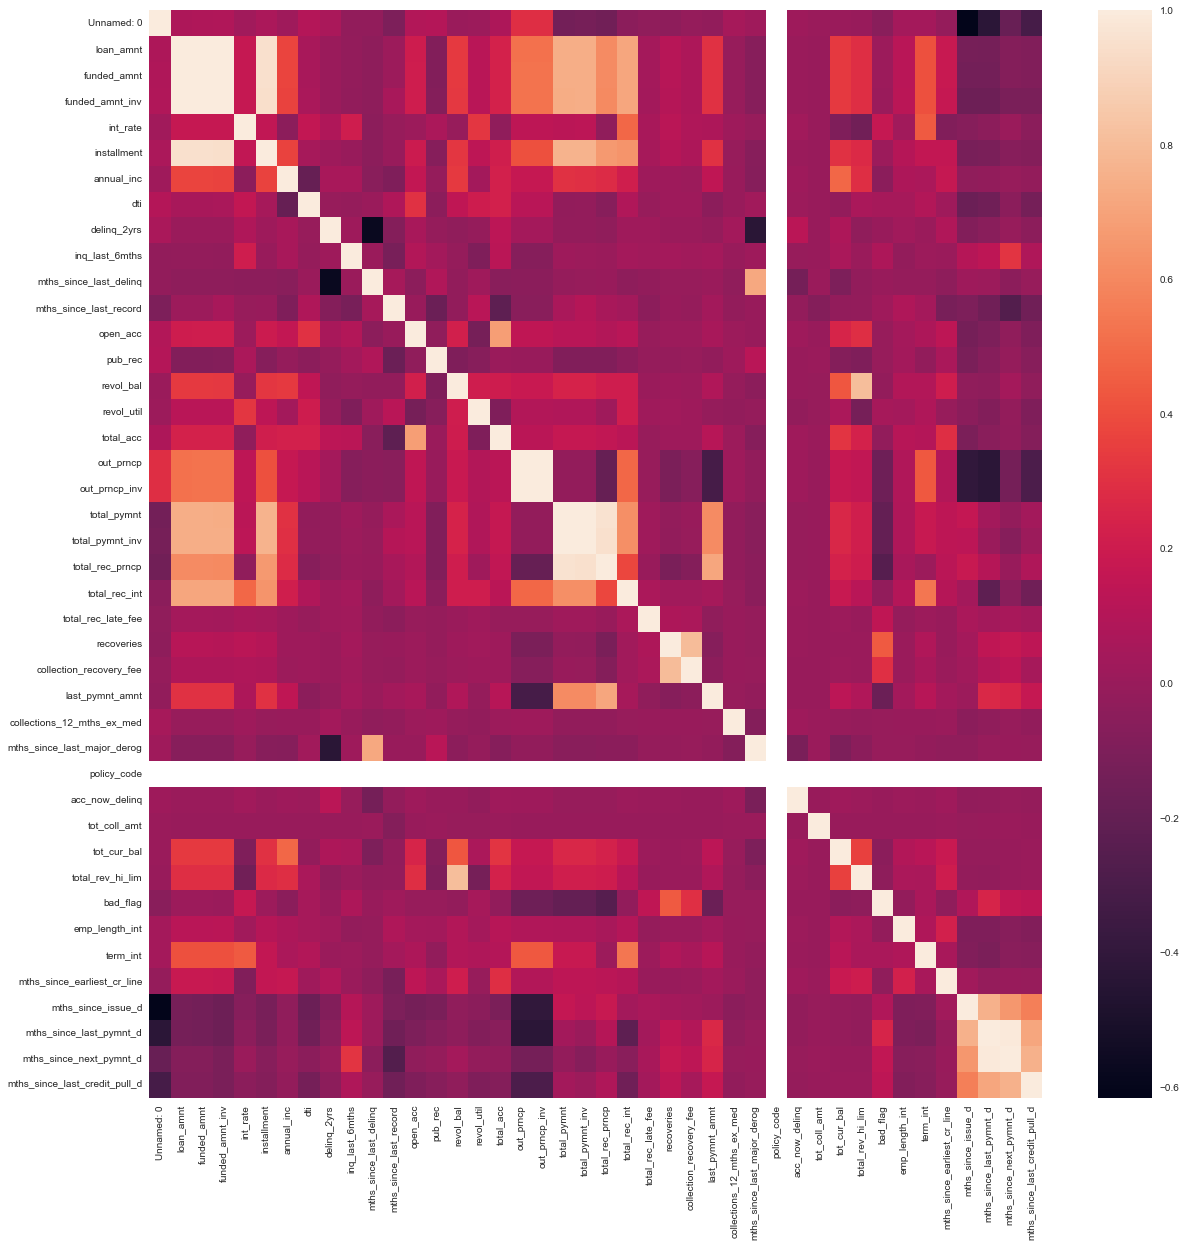

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [42]:
corr_matrix = df2.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\VICKYJ~1\AppData\Local\Temp/ipykernel_11688/667160332.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [43]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [44]:
df2.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [45]:
df2.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

At this stage, the features that have a very high unique value (high cardinality) are removed and features that only have one unique value.

In [46]:
df2.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [47]:
df2.select_dtypes(exclude='object').nunique()

Unnamed: 0                     466285
loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_i

Apparently, in data types other than object  there are also features that only have one unique value, so they will be discarded as well.

In [48]:
df2.drop(['policy_code'], axis=1, inplace=True)

In [49]:
for col in df2.select_dtypes(include='object').columns.tolist():
    print(df2[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Features that are strongly dominated by just one value will be discarded at this stage.

In [50]:
df2.drop('pymnt_plan', axis=1, inplace=True)

# Missing Values

### Missing Value Checking

In [51]:
check_missing = df2.isnull().sum() * 100 / df2.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

Here, the columns with missing values ​​above 75% are discarded

In [52]:
df2.drop('mths_since_last_record', axis=1, inplace=True)

### Missing Values Filling

In [53]:
df2['annual_inc'].fillna(df2['annual_inc'].mean(), inplace=True)
df2['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df2['acc_now_delinq'].fillna(0, inplace=True)
df2['total_acc'].fillna(0, inplace=True)
df2['pub_rec'].fillna(0, inplace=True)
df2['open_acc'].fillna(0, inplace=True)
df2['inq_last_6mths'].fillna(0, inplace=True)
df2['delinq_2yrs'].fillna(0, inplace=True)
df2['collections_12_mths_ex_med'].fillna(0, inplace=True)
df2['revol_util'].fillna(0, inplace=True)
df2['emp_length_int'].fillna(0, inplace=True)
df2['tot_cur_bal'].fillna(0, inplace=True)
df2['tot_coll_amt'].fillna(0, inplace=True)
df2['mths_since_last_delinq'].fillna(-1, inplace=True)

# Feature Encoding

### One Hot Encoding

All categorical columns are done by One Hot Encoding.

In [54]:
categorical_cols = [col for col in df2.select_dtypes(include='object').columns.tolist()]

In [55]:
onehot = pd.get_dummies(df2[categorical_cols], drop_first=True)

In [56]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Transformation

### Standardization

All numerical columns are standardized with StandardScaler.

In [57]:
numerical_cols = [col for col in df2.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [58]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df2[numerical_cols]), columns=numerical_cols)

In [59]:
std.head()

,Unnamed: 0,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.732047,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.732040,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,...,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.732032,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-1.732025,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,...,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.732017,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


### Transformed Dataframe

Merge the transformed columns

In [60]:
df2_model = pd.concat([onehot, std, df2[['bad_flag']]], axis=1)

# Modelling

### Separate / Split Train-Test Data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df2_model.drop('bad_flag', axis=1)
y = df2_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape, X_test.shape

((373028, 100), (93257, 100))

### Training

In this example, the Random Forest algorithm is used for modeling.

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [66]:
feature_importance = pd.DataFrame({
    'Features':X_train.columns,
    'Importance':rfc.feature_importances_}).sort_values('Importance', ascending=False)

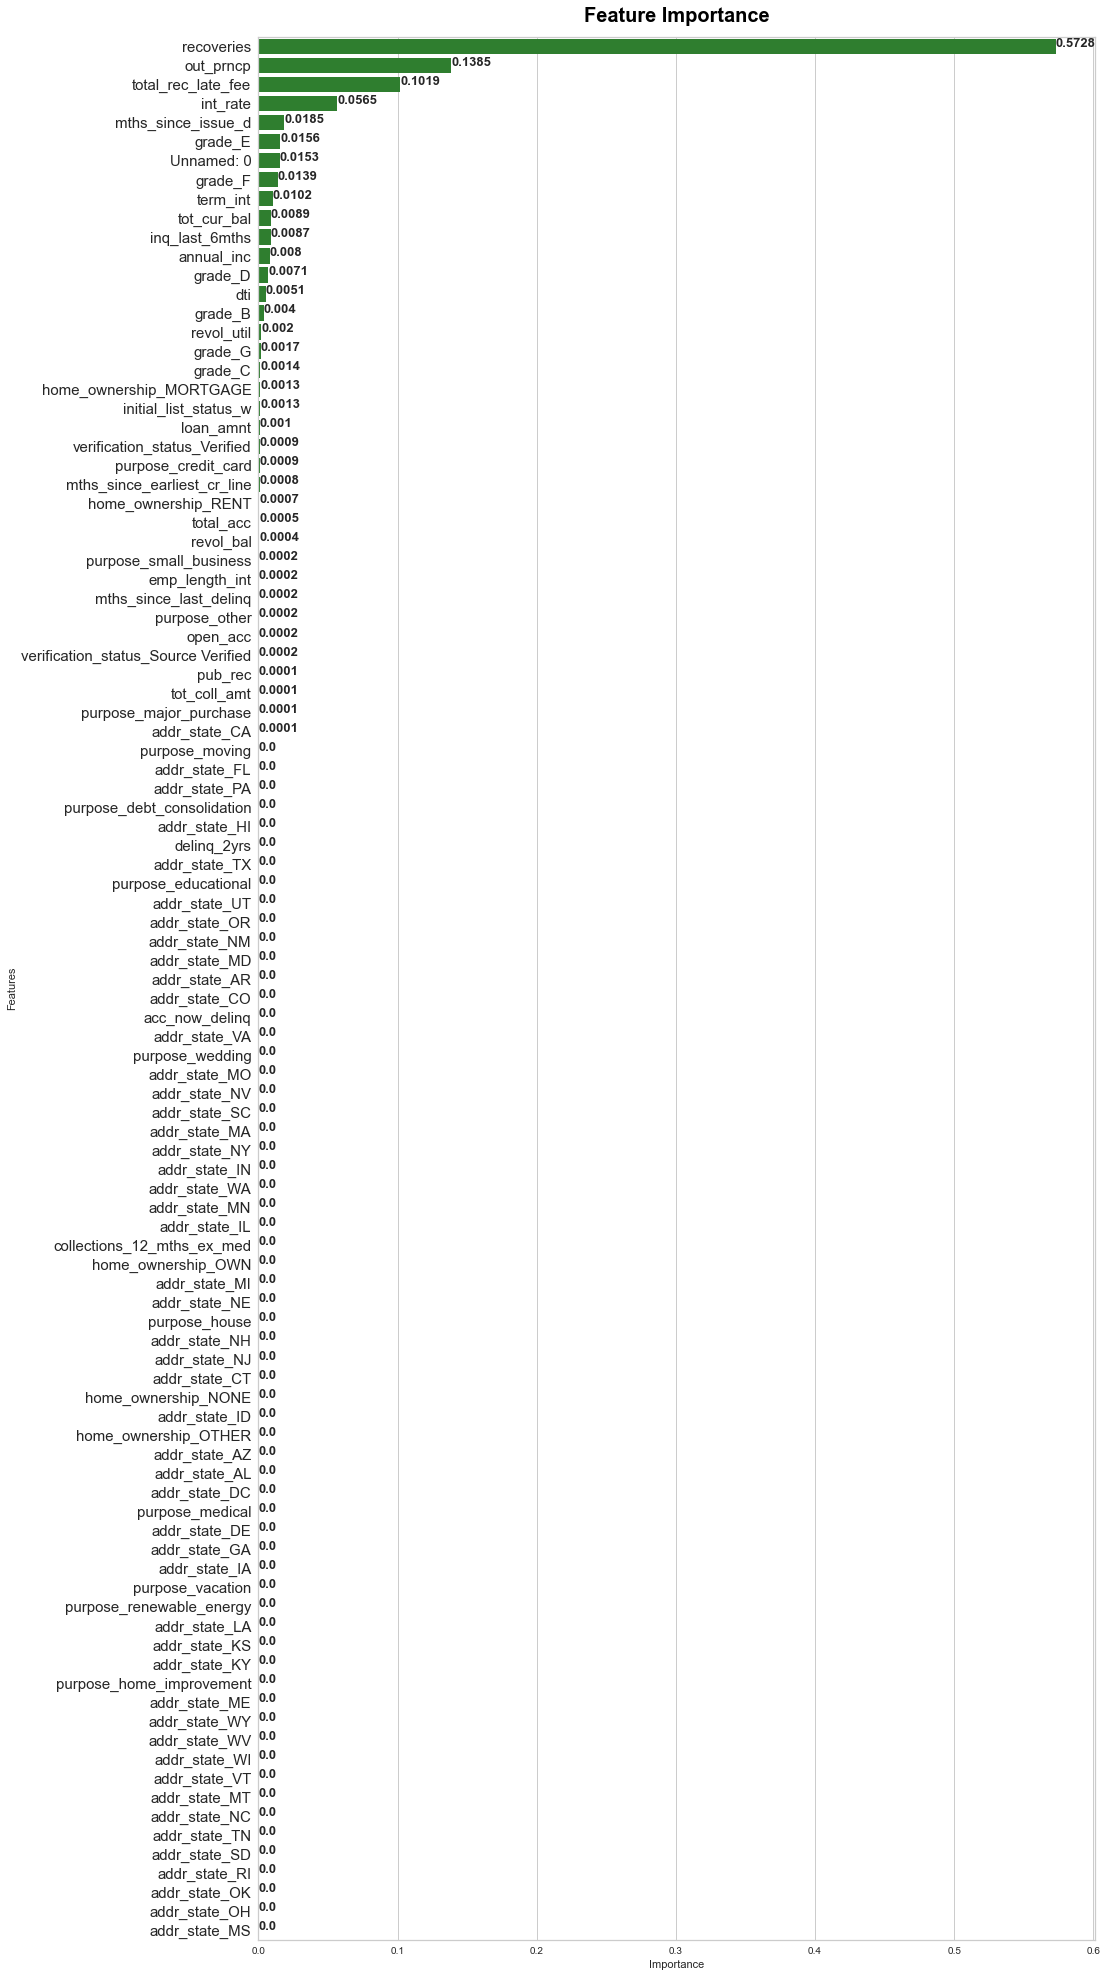

In [67]:
plt.figure(figsize=(15, 35))
sns.barplot(data=feature_importance, x='Importance', y='Features', color='forestgreen')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(feature_importance['Importance'])
y = list(feature_importance['Features'])

plt.title('Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()

There are 4 features which are the features has the highest scores that affect the model such as :

    - Recoveries
    - out_prncp
    - total_rec_late_fee
    - int_rate

### Validation

To measure model performance of credit risk, I used AUC.

In [68]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC 

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

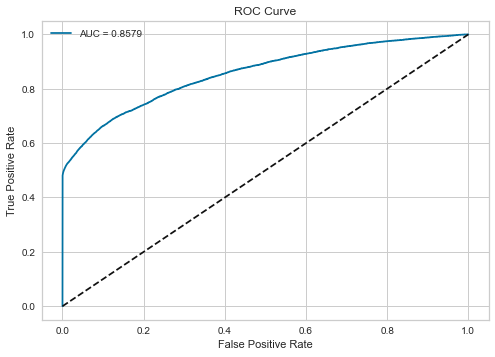

In [70]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

The built model yields of AUC = 0.857. This is good perfomance.

In [71]:
rfc = RandomForestClassifier(max_depth=4)
# Fit classifier
rfc.fit(X_train, y_train)

# Predict test set
y_pred_proba = rfc.predict(X_test)

#Calculate accuracy, precision, recall, and f1-score
train_score_rfc = round((rfc.score(X_train, y_train) * 100), 2)
test_score_rfc = round((rfc.score(X_test, y_test) * 100), 2)
prec_score_rfc = round((precision_score(y_test, y_pred_proba)) * 100, 2)
recall_score_rfc = round((recall_score(y_test, y_pred_proba)) * 100, 2)
f1_rfc = round(f1_score(y_test, y_pred_proba)*100, 2)

print('Training Accuracy : {}%'.format(train_score_rfc))
print('Test Accuracy : {}%'.format(test_score_rfc))
print('Precision Score : {}%'.format(prec_score_rfc))
print('Recall Score : {}%'.format(recall_score_rfc))
print('F1 Score : {}%'.format(f1_rfc))

Training Accuracy : 89.27%
Test Accuracy : 89.28%
Precision Score : 100.0%
Recall Score : 1.87%
F1 Score : 3.68%


[[83067     0]
 [ 9999   191]]


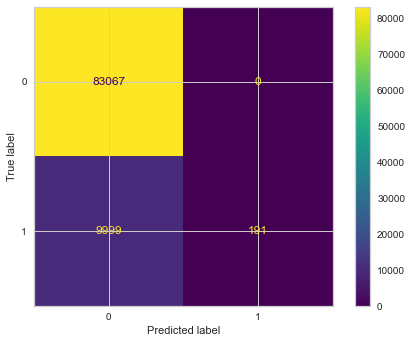

In [74]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_proba)
print(cm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [76]:
# Classification report model
cr = classification_report(y_test, y_pred_proba)
print(cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     83067
           1       1.00      0.02      0.04     10190

    accuracy                           0.89     93257
   macro avg       0.95      0.51      0.49     93257
weighted avg       0.90      0.89      0.84     93257



# Recommendation

Can consider making a Credit Scorecard to get higher interpretability.